## Determination of π

Sample Size of the desired Monte Carlo simulation 1000000


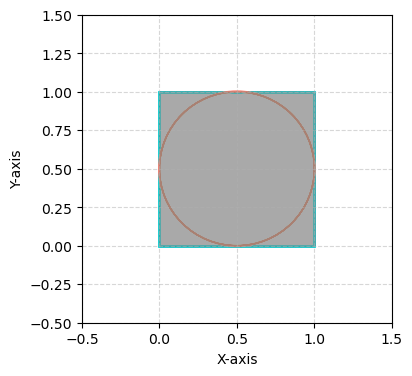

3.1388


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import math


# Part 1 : Creation of Random points in a square of size 1

num_points = int(input("Sample Size of the desired Monte Carlo simulation "))
points_x = np.random.uniform(0, 1, num_points)
points_y = np.random.uniform(0, 1, num_points)

# Create figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Set limits from 0 to 1 for both axes
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# Draw a square from (0,0) to (1,1)
square = plt.Rectangle((0, 0), 1, 1, fill=None, edgecolor='darkturquoise', linewidth=2)
circle = plt.Circle((0.5, 0.5), 0.5,fill=None, edgecolor='salmon', linewidth=2)
ax.add_patch(square)
ax.add_patch(circle)

# Labels and grid
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Which size to use for a point on the graph ?
# With 1000 points and s=0.1, it is very clear so we want to keep num_points*s = 100
ax.scatter(points_x, points_y, color='darkgrey', s=100/num_points)
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

nb_points_inside = 0
for point in range(num_points) :
    if math.sqrt((points_x[point]-0.5)**2+(points_y[point]-0.5)**2)<0.5 :
        nb_points_inside+= 1

pi = 4*nb_points_inside/num_points

print(pi)